In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.integrate import solve_ivp
from scipy.constants import pi, Stefan_Boltzmann



In [50]:
K = 1e-3         # Constante para la EoS polytropic (ajustable)
gamma = 2.0      # Índice adiabático
r_max = 20.0     # Radio máximo de integración
c = 1    # velocidad de la luz (cm/s)

In [51]:
# Ecuación de estado inversa: ρ(P)
def eos_pressure_to_density(P):
    return (P / K)**(1 / gamma) if P > 0 else 0.0

# Ecuación de estado directa: P(ρ)
def eos_density_to_pressure(rho):
    return K * rho**gamma

# Generación de energía nuclear ε(rho, T)
def energy_generation(rho, T):
    return 1e-5 * rho * T**4  # forma simplificada y arbitraria

# Gradiente de temperatura
def dT_dr(r, rho, L, T):
    kappa = 0.4  # opacidad promedio (cm^2/g)
    if r <= 0:
        return 0.0
    return - (3 * kappa * rho * L) / (64 * pi * Stefan_Boltzmann * T**3 * r**2)

# Ecuaciones extendidas de estructura estelar: TOV + energía + temperatura
def extended_rhs(r, y):
    P, m, L, T = y
    if P <= 0 or r <= 0 or T <= 0:
        return [0.0, 0.0, 0.0, 0.0]
    rho = eos_pressure_to_density(P)
    dPdr = -(rho + P) * (m + 4 * np.pi * r**3 * P) / (r * (r - 2 * m))
    dmdr = 4 * np.pi * r**2 * rho
    eps = energy_generation(rho, T)
    dLdr = 4 * np.pi * r**2 * rho * eps
    dTdr_val = dT_dr(r, rho, L, T)
    return [dPdr, dmdr, dLdr, dTdr_val]

# Integrar estrella con temperatura inicial T0
def integrate_star_extended(Pc, T0):
    r0 = 1e-5
    y0 = [Pc, 0.0, 0.0, T0]  # y = [P, m, L, T]

    def event_surface(r, y):
        return y[0]  # detener cuando P → 0
    event_surface.terminal = True
    event_surface.direction = -1

    sol = solve_ivp(
        extended_rhs, (r0, r_max), y0,
        method='RK45', max_step=0.1,
        events=event_surface
    )

    return sol.t, sol.y[0], sol.y[1], sol.y[2], sol.y[3]  # r, P, m, L, T


In [ ]:
# Parámetros iniciales
Pc = 1e-3
T0 = 10e7 # Temperatura central (K)

# Ejecutar integración
r_vals, P_vals, m_vals, L_vals, T_vals = integrate_star_extended(Pc, T0)

# Resultados
R_star = r_vals[-1]
M_star = m_vals[-1]

print(f"Radio estelar R ≈ {R_star:.2f} km")
print(f"Masa estelar M ≈ {M_star:.2f} (unidades geométricas)")

Radio estelar R ≈ 0.04 km
Masa estelar M ≈ 0.00 (unidades geométricas)


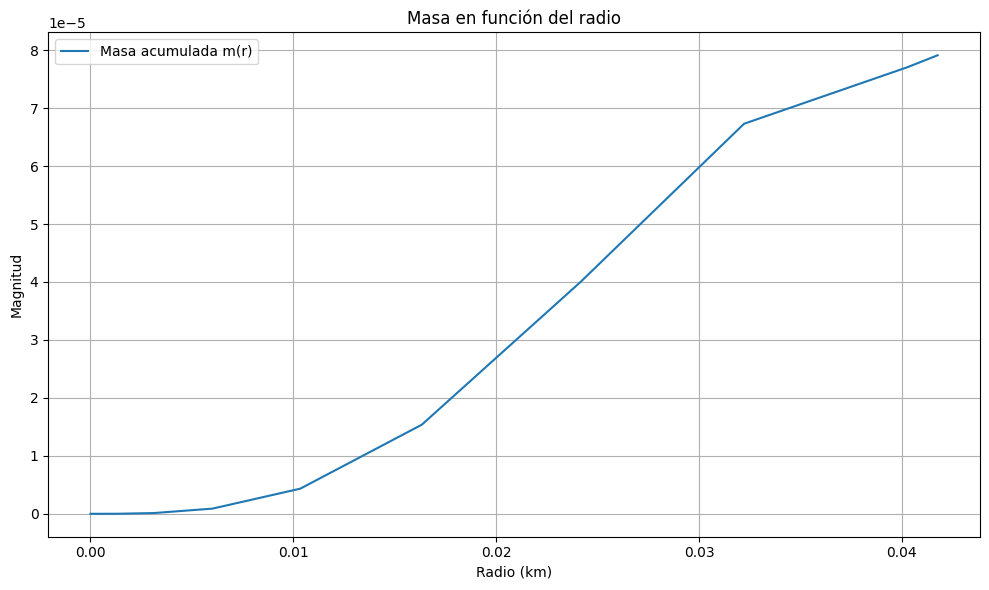

In [53]:
# Graficar resultados
plt.figure(figsize=(10, 6))
plt.plot(r_vals, m_vals, label='Masa acumulada m(r)')
plt.xlabel('Radio (km)')
plt.ylabel('Magnitud')
plt.title('Masa en función del radio')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

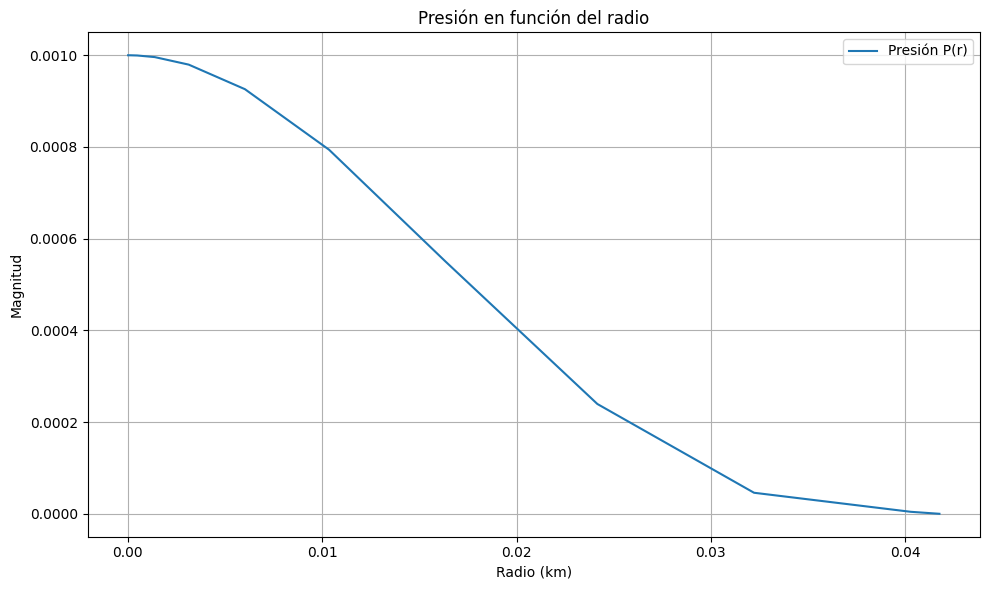

In [54]:
# Graficar resultados
plt.figure(figsize=(10, 6))
plt.plot(r_vals, P_vals, label='Presión P(r)')
plt.xlabel('Radio (km)')
plt.ylabel('Magnitud')
plt.title('Presión en función del radio')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

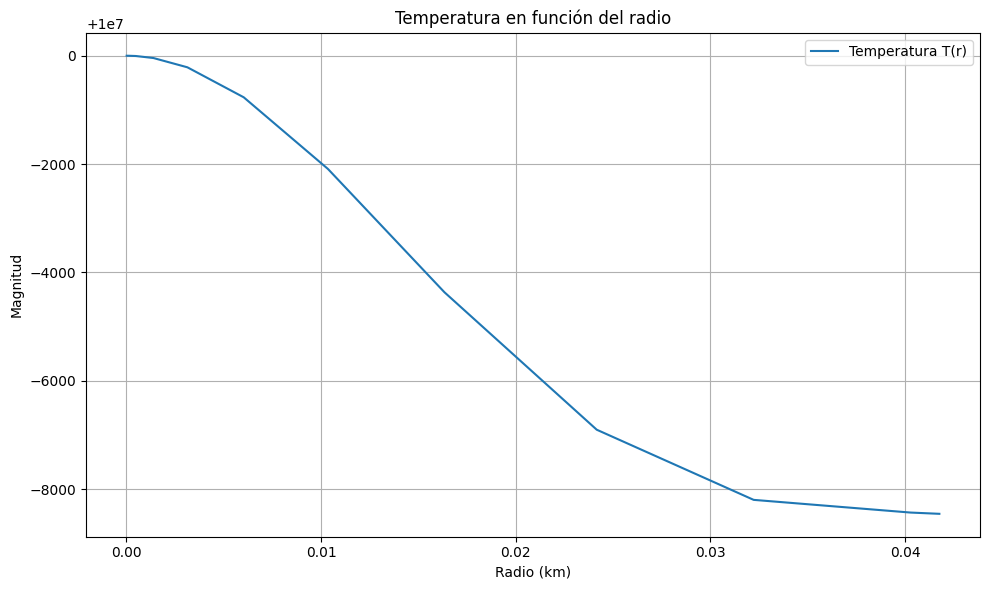

In [55]:
# Graficar resultados
plt.figure(figsize=(10, 6))
plt.plot(r_vals, T_vals, label='Temperatura T(r)')
plt.xlabel('Radio (km)')
plt.ylabel('Magnitud')
plt.title('Temperatura en función del radio')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

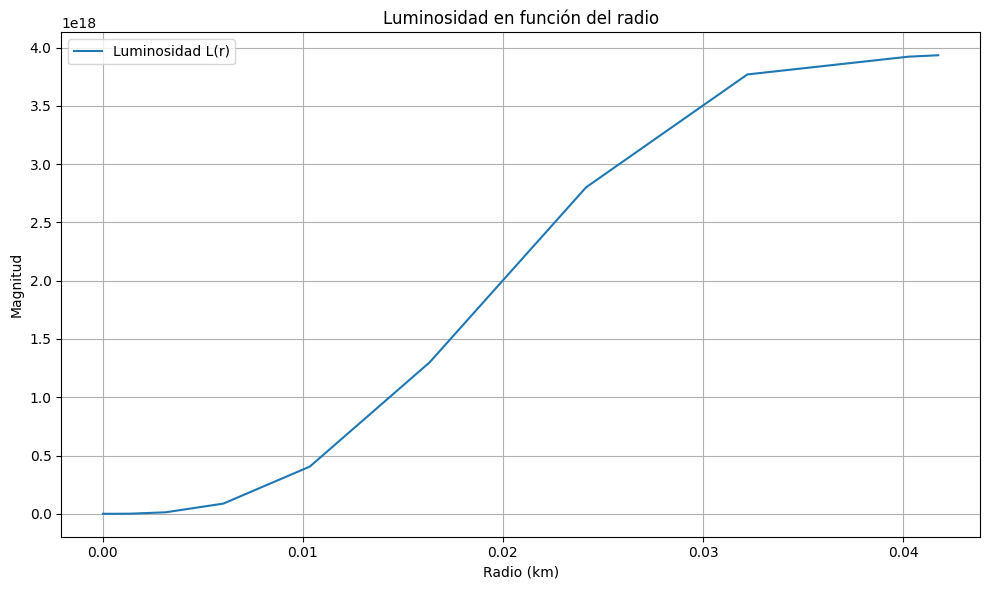

In [56]:
# Graficar resultados
plt.figure(figsize=(10, 6))
plt.plot(r_vals, L_vals, label='Luminosidad L(r)')
plt.xlabel('Radio (km)')
plt.ylabel('Magnitud')
plt.title('Luminosidad en función del radio')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()